¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola! Recuerda que para los ejercicio de análisis de datos es necesario desarrollar la introducción, objetivo y etapas de análisis. Esto es crucial para cualquier proyecto, ya que establece una guía clara sobre los pasos a seguir. Tener estos elementos bien definidos desde el principio nos permite trabajar de manera más organizada y eficiente. En un futuro lo podrías complementar con una tabla de contenido.
</div>

# Proyecto Sprint 7

<p> Paso 1. Abre el archivo de datos y estudia la informaci&oacute;n general  Ruta de archivo: /datasets/games.csv . Descarga el dataset</p>

In [7]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
games = pd.read_csv('/datasets/games.csv')

print(games.info())
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## preparación de datos


<li>Reemplaza los nombres de las columnas (ponlos en min&uacute;sculas).</li>
<li>Convierte los datos en los tipos necesarios.</li>
<li>Describe las columnas en las que los tipos de datos han sido cambiados y explica por qu&eacute;.</li>
<li>Si es necesario, elige la manera de tratar los valores ausentes:</li>
<ul>
<li>Explica por qu&eacute; rellenaste los valores ausentes como lo hiciste o por qu&eacute; decidiste dejarlos en blanco.</li>
<li>&iquest;Por qu&eacute; crees que los valores est&aacute;n ausentes? Brinda explicaciones posibles.</li>
<li>Presta atenci&oacute;n a la abreviatura TBD: significa "to be determined" (a determinar). Especifica c&oacute;mo piensas manejar estos casos.</li>
</ul>
<li>Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.</li>
</ul>

In [9]:
# Lista para almacenar los nuevos nombres de columnas
new_col_names = []

# Itera sobre los nombres actuales de las columnas en el DataFrame 'games'
for old_name in games.columns:
    # Elimina los espacios al principio y al final del nombre
    name_stripped = old_name.strip()
    # Convierte todas las letras a minúsculas
    name_lowered = name_stripped.lower()
    # Reemplaza los espacios entre palabras por guiones bajos
    name_no_spaces = name_lowered.replace(' ', '_')
    # Agrega el nuevo nombre a la lista de nuevos nombres de columna
    new_col_names.append(name_no_spaces)

# Reemplaza los nombres anteriores por los nuevos
games.columns = new_col_names

# Muestra los primeros registros para verificar los cambios
print(games.head())


                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [10]:
# Convertir 'Year_of_Release' de float a un int
games['year_of_release'] = games['year_of_release'].astype('Int64')

# Convertir 'User_Score' de object a float
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

print(games.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB
None


<ul>
<li>Se ha convertido la columna year_of_release en tipo int. Llenando los valores faltantes con 0.</li>
<li>Se ha convertido la columna user_score a tipo float. Reemplazando cualquier valor no numerico con NaN</li>
</ul>

In [11]:
# Eliminar filas con valores faltantes en 'Name', 'Platform' y 'Genre'
games = games.dropna(subset=['name', 'platform', 'genre'])

# Rellenar los valores faltantes en 'Year_of_Release' con la mediana
games['year_of_release'] = games['year_of_release'].fillna(games['year_of_release'].median())

# Rellenar los valores faltantes en 'User_Score' con la mediana
games['user_score'] = games['user_score'].fillna(games['user_score'].median())

# Rellenar los valores faltantes en 'Critic_Score' con la media
games['critic_score'] = games['critic_score'].fillna(games['critic_score'].mean())

# Rellenar los valores faltantes en 'Rating' con la moda
games['rating'] = games['rating'].fillna(games['rating'].mode()[0])

# Verifica si aún quedan valores faltantes
print(games.isnull().sum())


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo completando los valores nulos con la mediana. Como sabes, cuando trabajamos con distribuciones sesgadas se recomienda completar los valores nulos con la mediana para no sesgar nuestrso resultados
</div>

<p>Se realizan los siguientes cambios:</p>
<ol>
<li><strong>Eliminar filas con valores faltantes:</strong> Esto es &uacute;til si la cantidad de filas afectadas es peque&ntilde;a y no afecta.</li>
<li><strong>Rellenar valores faltantes con un valor espec&iacute;fico:</strong>rellenar los valores faltantes con la media.</li>
<li><strong>Rellenar valores faltantes con la moda (para datos categ&oacute;ricos):</strong>cambios realizados en la columna<code>Rating</code>.</li>
</ol>

In [12]:
# Convertir year_of_release a entero
games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)

# Convertir user_score a float, reemplazando los valores no numéricos por NaN
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

# Verificar los cambios
print(games.dtypes)
games.head()



name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.5,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.5,E


In [13]:
# Identificar valores faltantes en cada columna
missing_values = games.isnull().sum()

# Mostrar los valores faltantes
print(missing_values)



name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


Parece que no hay valores faltantes en el DataFrame después de los pasos anteriores, lo cual es un buen indicio de que los datos están limpios y listos para su análisis.

In [14]:
# Genera estadisticas de las columnas
summary_stats = games.describe()

# Muestras las estadisticas
summary_stats


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,2006.494525,0.263302,0.145045,0.077625,0.047343,68.967679,7.329719
std,5.828405,0.813565,0.503359,0.308871,0.186742,9.725162,1.027910
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,68.967679,7.500000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,68.967679,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.500000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


## Analisis de datos

<li>Mira cu&aacute;ntos juegos fueron lanzados en diferentes a&ntilde;os. &iquest;Son significativos los datos de cada per&iacute;odo?</li>
<li>Observa c&oacute;mo var&iacute;an las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribuci&oacute;n basada en los datos de cada a&ntilde;o. Busca las plataformas que sol&iacute;an ser populares pero que ahora no tienen ventas. &iquest;Cu&aacute;nto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?</li>
<li>Determina para qu&eacute; per&iacute;odo debes tomar datos.Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deber&iacute;an permitirte construir un modelo para 2017.</li>
<li>Trabaja solo con los datos que consideras relevantes. Ignora los datos de a&ntilde;os anteriores.</li>
<li>&iquest;Qu&eacute; plataformas son l&iacute;deres en ventas? &iquest;Cu&aacute;les crecen y cu&aacute;les se reducen? Elige varias plataformas potencialmente rentables.</li>
<li>Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. &iquest;Son significativas las diferencias en las ventas? &iquest;Qu&eacute; sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.</li>
<li>Mira c&oacute;mo las rese&ntilde;as de usuarios y profesionales afectan las ventas de una plataforma popular (tu elecci&oacute;n). Crea un gr&aacute;fico de dispersi&oacute;n y calcula la correlaci&oacute;n entre las rese&ntilde;as y las ventas. Saca conclusiones.</li>
<li>Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.</li>
<li>Echa un vistazo a la distribuci&oacute;n general de los juegos por g&eacute;nero. &iquest;Qu&eacute; se puede decir de los g&eacute;neros m&aacute;s rentables? &iquest;Puedes generalizar acerca de los g&eacute;neros con ventas altas y bajas?</li>
</ul>
</li>
</ul>

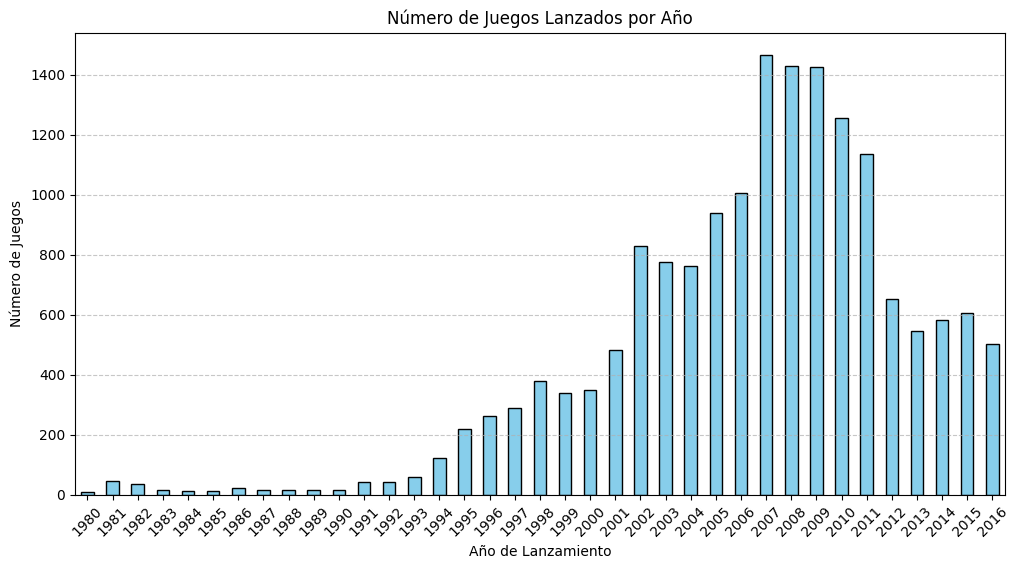

In [15]:
# Contar el número de juegos lanzados por año
games_per_year = games['year_of_release'].value_counts().sort_index()

# Crear un gráfico de barras para mostrar el número de juegos lanzados cada año
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


El mayor indice de lanzamientos los encontramos entre los años 2007,2008 y 2009. con un promedio de 1400 lanzamientos

<Figure size 1200x800 with 0 Axes>

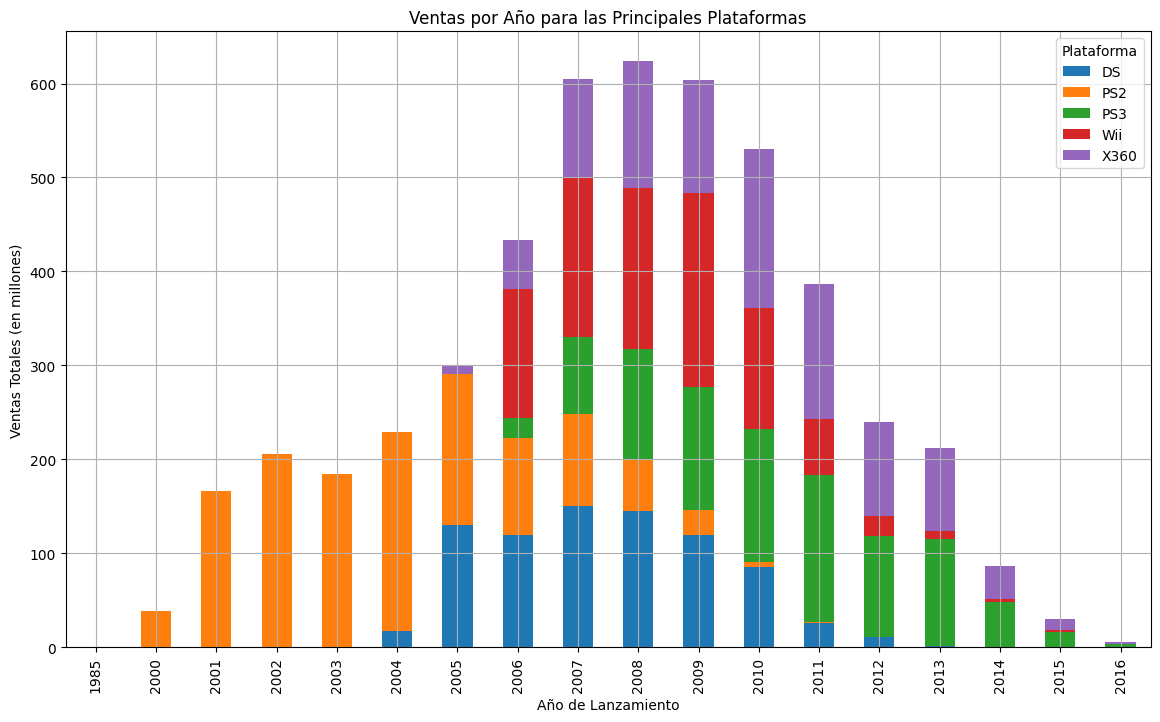

In [16]:
# Sumar las ventas globales por plataforma
platform_sales = games.groupby('platform')['na_sales', 'eu_sales', 'jp_sales', 'other_sales'].sum().sum(axis=1)

# Seleccionar las plataformas con las mayores ventas totales
top_platforms = platform_sales.sort_values(ascending=False).head(5).index

# Filtrar el DataFrame original para solo incluir los datos de estas plataformas
top_platforms_data = games[games['platform'].isin(top_platforms)]

# Agrupar los datos por plataforma y año de lanzamiento, y sumar las ventas globales
platform_sales_per_year = top_platforms_data.groupby(['year_of_release', 'platform'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales'].sum().sum(axis=1).unstack()

# Crear la visualización
plt.figure(figsize=(12, 8))
platform_sales_per_year.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Ventas por Año para las Principales Plataformas')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (en millones)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()



<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica. Solamente te recomendaría que intentes reducir el periodo dado que el perido actual puede resultar muy extenso. Recordemos que con base en la información la popularidad la alcanzan en los primeros años. Es por ello que con un periodo largo puede no ser posible analizar de forma clara las plataformas y videojuegos actualizados y podrías estar analizando los desactualizados. Es por ello y dado que buscamos responder qué vender en 2017 te recomendareia gráficar un periodo que no supere los 5 años.     

</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

[Gracias por el comentario. Tendre en cuenta la relevancia de los datos en cuanto a los periodos solicitados y mas destacables para mejorar la precision de las presentaciones]
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

In [17]:
# Filtrar los datos para el periodo 2007-2009
filtered_sales = games.loc[(games['year_of_release'] >= 2007) & (games['year_of_release'] <= 2009)]

# Seleccionar solo las plataformas de interés
platforms_of_interest = ['DS', 'PS2', 'PS3', 'Wii', 'X360']
filtered_sales = filtered_sales[filtered_sales['platform'].isin(platforms_of_interest)]

# Crear una nueva columna para las ventas globales
filtered_sales['total_sales'] = (
    filtered_sales['na_sales'] + 
    filtered_sales['eu_sales'] + 
    filtered_sales['jp_sales'] + 
    filtered_sales['other_sales']
)

# Agrupar por plataforma y calcular el total de ventas
sales_per_platform = filtered_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Mostrar el resultado
print(sales_per_platform)



platform
Wii     547.39
DS      415.13
X360    361.14
PS3     330.95
PS2     178.50
Name: total_sales, dtype: float64


Esta grafica de ventas complementa la informacion de los resultados mostrados anteriormente. 
Encontramos una tendencia entre los años 2007-2009 coincidiendo el indice mas alto  entre ventas y lanzamientos.
las 5 plataformas mas populares muestran tenedencias parecidas de venta en esos mismos años encabezadas por wii, ds y x360
Tambien podemos concluir que al menos para las plataformas mas populares tenemos un tiempo de vida de aproximadamente 10 años 


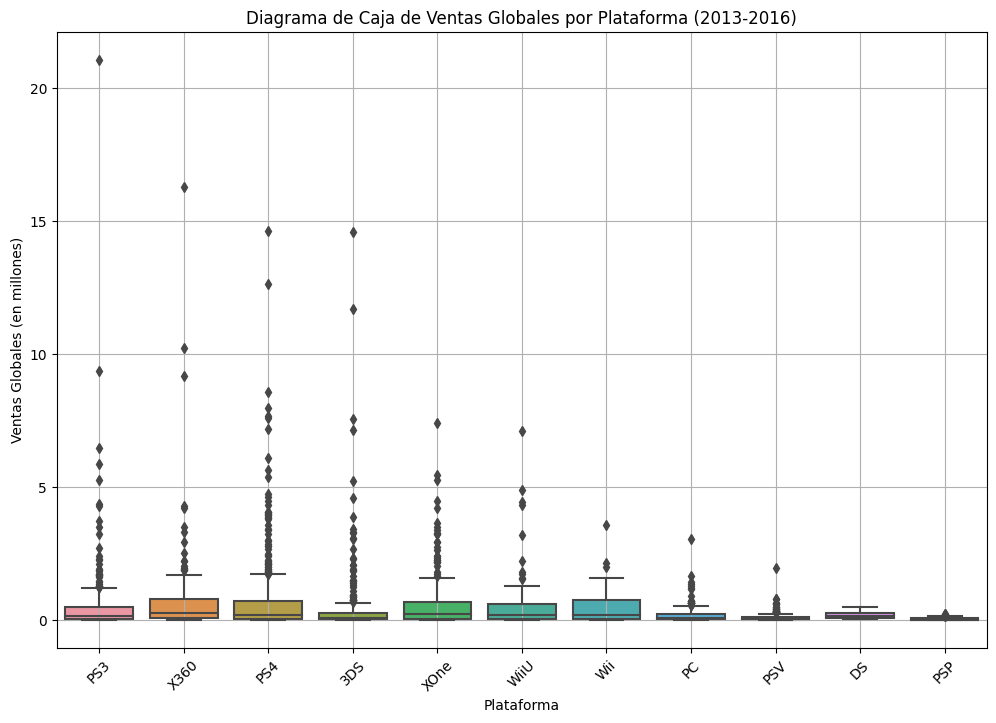

In [27]:
import pandas as pd

# Cargar el DataFrame desde un archivo CSV
games = pd.read_csv('/datasets/games.csv')

# Ahora puedes ejecutar tu código
if 'Year_of_Release' in games.columns:
    # Filtrar los datos para el período 2013-2016
    filtered_data = games[(games['Year_of_Release'] >= 2013) & (games['Year_of_Release'] <= 2016)]

    # Hacer una copia del conjunto de datos filtrado
    filtered_data_copy = filtered_data.copy()

    # Crear una nueva columna para las ventas globales
    filtered_data_copy['global_sales'] = (
        filtered_data_copy['NA_sales'] + 
        filtered_data_copy['EU_sales'] + 
        filtered_data_copy['JP_sales'] + 
        filtered_data_copy['Other_sales']
    )

    # Crear el diagrama de caja
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Platform', y='global_sales', data=filtered_data_copy)
    plt.title('Diagrama de Caja de Ventas Globales por Plataforma (2013-2016)')
    plt.xlabel('Plataforma')
    plt.ylabel('Ventas Globales (en millones)')
    plt.xticks(rotation=45)  # Opcional: rota las etiquetas del eje x
    plt.grid(True)  # añade una cuadrícula para mejor visualización
    plt.show()

else:
    print("La columna 'Year_of_Release' no existe en el DataFrame.")



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Solamente verifica que cuentas con la variable "'Year_of_Release'"  

</div>


<div class="alert alert-block alert-info">
<b>Consegui corregir el error en la variable "Year_of_Release" cargando el data set directamente y añadiendendo una funcion if else  para comprobar datos </b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

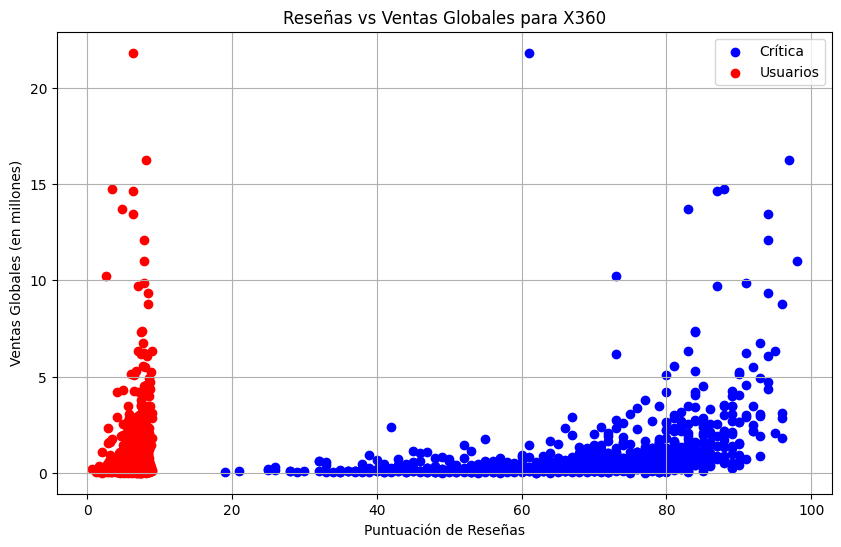

Correlación entre las reseñas de críticos y las ventas globales: 0.3937358653072588
Correlación entre las reseñas de usuarios y las ventas globales: 0.11445882978454185


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
games = pd.read_csv('/datasets/games.csv')

# Filtrar los datos para la plataforma X360
x360_data = games[games['Platform'] == 'X360'].copy()

# Crear una nueva columna para las ventas globales
x360_data['Global_sales'] = (
    x360_data['NA_sales'] + 
    x360_data['EU_sales'] + 
    x360_data['JP_sales'] + 
    x360_data['Other_sales']
)

# Convertir las columnas de reseñas a numéricas, manejando posibles errores
x360_data['User_Score'] = pd.to_numeric(x360_data['User_Score'], errors='coerce')
x360_data['Critic_Score'] = pd.to_numeric(x360_data['Critic_Score'], errors='coerce')

# Crear un gráfico de dispersión para analizar la relación entre reseñas y ventas globales
plt.figure(figsize=(10, 6))
plt.scatter(x360_data['Critic_Score'], x360_data['Global_sales'], color='blue', label='Crítica')
plt.scatter(x360_data['User_Score'], x360_data['Global_sales'], color='red', label='Usuarios')
plt.title('Reseñas vs Ventas Globales para X360')
plt.xlabel('Puntuación de Reseñas')
plt.ylabel('Ventas Globales (en millones)')
plt.legend()
plt.grid(True)
plt.show()

# Calcular la correlación entre las reseñas y las ventas globales
critic_correlation = x360_data['Critic_Score'].corr(x360_data['Global_sales'])
user_correlation = x360_data['User_Score'].corr(x360_data['Global_sales'])

print("Correlación entre las reseñas de críticos y las ventas globales:", critic_correlation)
print("Correlación entre las reseñas de usuarios y las ventas globales:", user_correlation)


<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas. 
</div>

<ul>
<li>Se muestra una correlaci&oacute;n positiva moderada entre las rese&ntilde;as de cr&iacute;ticos y las ventas globales.<br/><br/></li>
<li>Las rese&ntilde;as de usuarios y las ventas globales es d&eacute;bil, indicando que las opiniones de los usuarios tienen poca influencia directa en las ventas</li>
</ul>

In [20]:
# Función para analizar las ventas por género
def analyze_genre_sales(df):
    # Calcula las ventas globales sumando las ventas regionales
    df['Global_sales'] = df['NA_sales'] + df['EU_sales'] + df['JP_sales'] + df['Other_sales']
    
    # Agrupa por género y suma las ventas globales
    genre_sales = df.groupby('Genre')['Global_sales'].sum().sort_values(ascending=False)
    
    # Cuenta la cantidad de juegos por género
    genre_counts = df['Genre'].value_counts()
    
    # Calcula el promedio de ventas globales por género
    avg_genre_sales = genre_sales / genre_counts
    
    # Crea un DataFrame con los resultados
    genre_summary = pd.DataFrame({
        'Total_sales': genre_sales,
        'Number_of_Games': genre_counts,
        'Average_sales_per_game': avg_genre_sales
    })
    
    # Imprime los resultados
    print("Distribución general de los juegos por género:\n")
    print(genre_summary)
    
    # Identifica los géneros con ventas altas y bajas
    high_sales_genres = genre_summary[genre_summary['Average_sales_per_game'] > genre_summary['Average_sales_per_game'].mean()]
    low_sales_genres = genre_summary[genre_summary['Average_sales_per_game'] <= genre_summary['Average_sales_per_game'].mean()]
    
    print("\nGéneros con ventas altas:")
    print(high_sales_genres)
    
    print("\nGéneros con ventas bajas:")
    print(low_sales_genres)
    
    return genre_summary, high_sales_genres, low_sales_genres

# Ejecutar la función con el DataFrame correcto
genre_summary, high_sales_genres, low_sales_genres = analyze_genre_sales(games)


Distribución general de los juegos por género:

              Total_sales  Number_of_Games  Average_sales_per_game
Action            1744.17             3369                0.517711
Adventure          237.59             1303                0.182341
Fighting           447.53              849                0.527126
Misc               802.51             1750                0.458577
Platform           827.77              888                0.932173
Puzzle             242.57              580                0.418224
Racing             728.67             1249                0.583403
Role-Playing       934.56             1498                0.623872
Shooter           1052.45             1323                0.795503
Simulation         389.97              873                0.446701
Sports            1331.27             2348                0.566980
Strategy           174.23              683                0.255095

Géneros con ventas altas:
              Total_sales  Number_of_Games  Average_sa

In [21]:
# Crear una columna de ventas globales sumando las ventas regionales
games['Global_sales'] = games['NA_sales'] + games['EU_sales'] + games['JP_sales'] + games['Other_sales']

# Filtrar los juegos de la plataforma X360
x360_games = games[games['Platform'] == 'X360']

# Agrupar por nombre del juego y sumar las ventas globales
x360_sales = x360_games.groupby('Name')['Global_sales'].sum().reset_index()

# Filtrar las ventas de los mismos juegos en otras plataformas
other_platforms_sales = games[games['Name'].isin(x360_sales['Name']) & (games['Platform'] != 'X360')]

# Agrupar por nombre del juego y plataforma, sumando las ventas globales
other_platforms_sales_grouped = other_platforms_sales.groupby(['Name', 'Platform'])['Global_sales'].sum().reset_index()

# Comparar las ventas entre X360 y otras plataformas
comparison = pd.merge(x360_sales, other_platforms_sales_grouped, on='Name', suffixes=('_X360', '_Other_Platform'))

# Mostrar los resultados de la comparación
print(comparison)




                              Name  Global_sales_X360 Platform  \
0           007: Quantum of Solace               1.48       DS   
1           007: Quantum of Solace               1.48       PC   
2           007: Quantum of Solace               1.48      PS2   
3           007: Quantum of Solace               1.48      PS3   
4           007: Quantum of Solace               1.48      Wii   
...                            ...                ...      ...   
2563     pro evolution soccer 2011               0.60      PS2   
2564     pro evolution soccer 2011               0.60      PS3   
2565     pro evolution soccer 2011               0.60      PSP   
2566     pro evolution soccer 2011               0.60      Wii   
2567  uDraw Studio: Instant Artist               0.02      Wii   

      Global_sales_Other_Platform  
0                            0.13  
1                            0.02  
2                            0.43  
3                            1.15  
4                          

podemos concluir que por lo general en general los titulos tienen ventas equilibradas entre las plataformas, mientras que otros títulos, como "Pro Evolution Soccer 2011", tienen significativamente mejores ventas en PS3 que en X360. 
Dicho de otra manera, la popularidad de un juego varía según la consola

<h2>Crea un perfil de usuario para cada regi&oacute;n</h2>
<p>Para cada regi&oacute;n (NA, UE, JP) determina:</p>
<ul>
<li>Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una regi&oacute;n a otra.</li>
<li>Los cinco g&eacute;neros principales. Explica la diferencia.</li>
<li>Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.</li>
</ul>


In [22]:
# Cargar el conjunto de datos
games = pd.read_csv('/datasets/games.csv')

# Verificar que los datos se hayan cargado correctamente
print(games.head())



                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


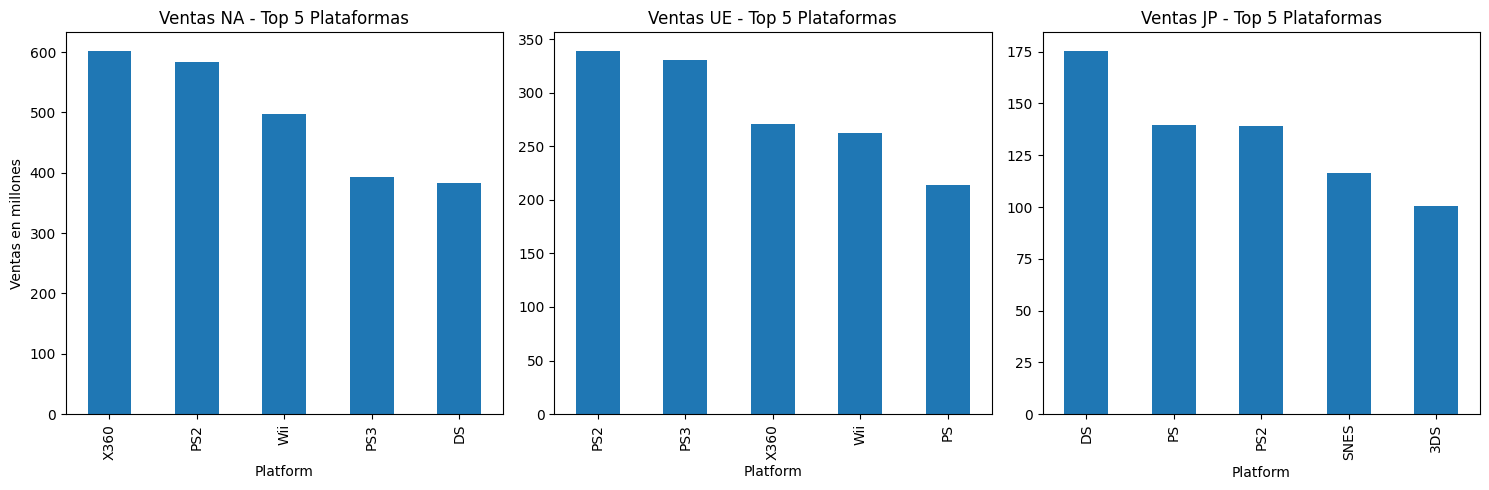

In [23]:
# Calcular las ventas totales por plataforma para cada región
platform_sales_na = games.groupby('Platform')['NA_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_eu = games.groupby('Platform')['EU_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_jp = games.groupby('Platform')['JP_sales'].sum().sort_values(ascending=False).head(5)

# Visualizar las cuotas de mercado en un gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
platform_sales_na.plot(kind='bar', title='Ventas NA - Top 5 Plataformas')
plt.ylabel('Ventas en millones')

plt.subplot(1, 3, 2)
platform_sales_eu.plot(kind='bar', title='Ventas UE - Top 5 Plataformas')

plt.subplot(1, 3, 3)
platform_sales_jp.plot(kind='bar', title='Ventas JP - Top 5 Plataformas')

plt.tight_layout()
plt.show()



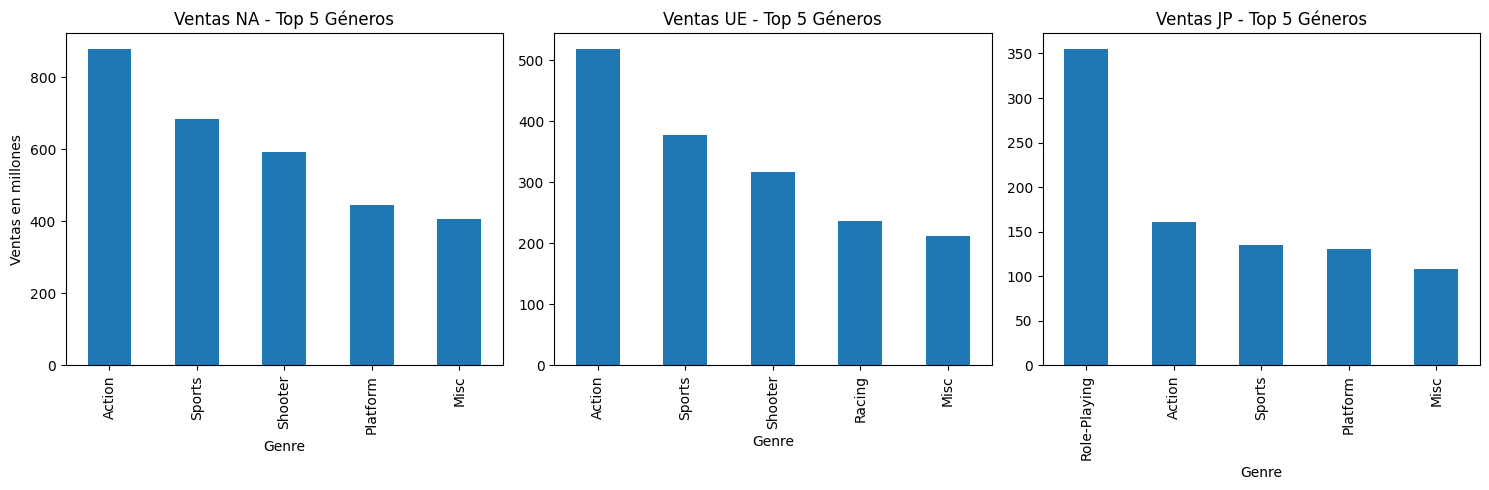

In [24]:
# Calcular las ventas totales por género para cada región
genre_sales_na = games.groupby('Genre')['NA_sales'].sum().sort_values(ascending=False).head(5)
genre_sales_eu = games.groupby('Genre')['EU_sales'].sum().sort_values(ascending=False).head(5)
genre_sales_jp = games.groupby('Genre')['JP_sales'].sum().sort_values(ascending=False).head(5)

# Visualizar las cuotas de mercado en un gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
genre_sales_na.plot(kind='bar', title='Ventas NA - Top 5 Géneros')
plt.ylabel('Ventas en millones')

plt.subplot(1, 3, 2)
genre_sales_eu.plot(kind='bar', title='Ventas UE - Top 5 Géneros')

plt.subplot(1, 3, 3)
genre_sales_jp.plot(kind='bar', title='Ventas JP - Top 5 Géneros')

plt.tight_layout()
plt.show()


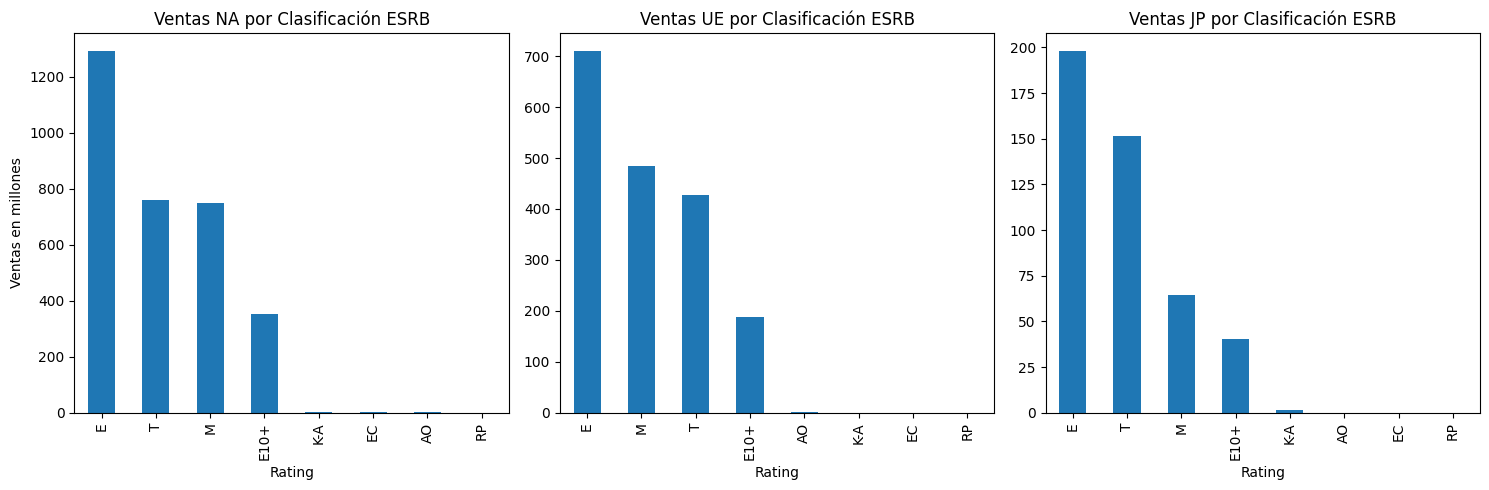

In [25]:
# Agrupar las ventas por clasificación ESRB y región
esrb_sales_na = games.groupby('Rating')['NA_sales'].sum().sort_values(ascending=False)
esrb_sales_eu = games.groupby('Rating')['EU_sales'].sum().sort_values(ascending=False)
esrb_sales_jp = games.groupby('Rating')['JP_sales'].sum().sort_values(ascending=False)

# Visualizar en gráficos de barras
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
esrb_sales_na.plot(kind='bar', title='Ventas NA por Clasificación ESRB')
plt.ylabel('Ventas en millones')

plt.subplot(1, 3, 2)
esrb_sales_eu.plot(kind='bar', title='Ventas UE por Clasificación ESRB')

plt.subplot(1, 3, 3)
esrb_sales_jp.plot(kind='bar', title='Ventas JP por Clasificación ESRB')

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

<h2><strong>Paso 5. Prueba las siguientes hip&oacute;tesis:</strong></h2>
<ul>
<li>Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.</li>
<li>Las calificaciones promedio de los usuarios para los g&eacute;neros de Acci&oacute;n y Deportes son diferentes.</li>
<li>Establece tu mismo el valor de umbral <em>alfa</em>.</li>
</ul>
<p>Explica:</p>
<p>C&oacute;mo formulaste las hip&oacute;tesis nula y alternativa.</p>
<p>Qu&eacute; criterio utilizaste para probar las hip&oacute;tesis y por qu&eacute;.</p>

In [26]:
import pandas as pd
from scipy import stats

# Convertir la columna User_Score a numérica, forzando errores a NaN
games['User_Score'] = pd.to_numeric(games['User_Score'], errors='coerce')

# Filtrar las plataformas Xbox One y PC
xbox_one_ratings = games[games['Platform'] == 'XOne']['User_Score'].dropna()
pc_ratings = games[games['Platform'] == 'PC']['User_Score'].dropna()

# Prueba t para la hipótesis 1 (Xbox One vs PC)
t_stat_1, p_val_1 = stats.ttest_ind(xbox_one_ratings, pc_ratings)

# Filtrar los géneros Acción y Deportes
action_ratings = games[games['Genre'] == 'Action']['User_Score'].dropna()
sports_ratings = games[games['Genre'] == 'Sports']['User_Score'].dropna()

# Prueba t para la hipótesis 2 (Acción vs Deportes)
t_stat_2, p_val_2 = stats.ttest_ind(action_ratings, sports_ratings)

# Establecer alfa
alpha = 0.05

# Mostrar los resultados
print("Hipótesis 1 (Xbox One vs PC):")
print(f"t-stat: {t_stat_1}, p-value: {p_val_1}")
if p_val_1 < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No rechazamos la hipótesis nula: Las calificaciones promedio son iguales.")

print("\nHipótesis 2 (Acción vs Deportes):")
print(f"t-stat: {t_stat_2}, p-value: {p_val_2}")
if p_val_2 < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No rechazamos la hipótesis nula: Las calificaciones promedio son iguales.")


Hipótesis 1 (Xbox One vs PC):
t-stat: -4.368333815003015, p-value: 1.3896435533548819e-05
Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.

Hipótesis 2 (Acción vs Deportes):
t-stat: 1.6259419280500857, p-value: 0.10406951359049141
No rechazamos la hipótesis nula: Las calificaciones promedio son iguales.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=True. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xbox_one_data['user_score'], pc_data['user_score'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

In [30]:
import pandas as pd
from scipy import stats

# Convertir la columna User_Score a numérica, forzando errores a NaN
games['User_Score'] = pd.to_numeric(games['User_Score'], errors='coerce')

# Filtrar las plataformas Xbox One y PC
xbox_one_ratings = games[games['Platform'] == 'XOne']['User_Score'].dropna()
pc_ratings = games[games['Platform'] == 'PC']['User_Score'].dropna()

# Prueba de Levene para verificar si las varianzas son iguales
levene_stat_1, levene_p_val_1 = stats.levene(xbox_one_ratings, pc_ratings)

# Definir equal_var en base al resultado de la prueba de Levene
equal_var_1 = levene_p_val_1 > 0.05

# Prueba t para la hipótesis 1 (Xbox One vs PC) con el valor de equal_var
t_stat_1, p_val_1 = stats.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=equal_var_1)

# Filtrar los géneros Acción y Deportes
action_ratings = games[games['Genre'] == 'Action']['User_Score'].dropna()
sports_ratings = games[games['Genre'] == 'Sports']['User_Score'].dropna()

# Prueba de Levene para verificar si las varianzas son iguales
levene_stat_2, levene_p_val_2 = stats.levene(action_ratings, sports_ratings)

# Definir equal_var en base al resultado de la prueba de Levene
equal_var_2 = levene_p_val_2 > 0.05

# Prueba t para la hipótesis 2 (Acción vs Deportes) con el valor de equal_var
t_stat_2, p_val_2 = stats.ttest_ind(action_ratings, sports_ratings, equal_var=equal_var_2)

# Establecer alfa
alpha = 0.05

# Mostrar los resultados
print("Hipótesis 1 (Xbox One vs PC):")
print(f"Prueba de Levene - p-value: {levene_p_val_1}")
print(f"t-stat: {t_stat_1}, p-value: {p_val_1}")
if p_val_1 < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No rechazamos la hipótesis nula: Las calificaciones promedio son iguales.")

print("\nHipótesis 2 (Acción vs Deportes):")
print(f"Prueba de Levene - p-value: {levene_p_val_2}")
print(f"t-stat: {t_stat_2}, p-value: {p_val_2}")
if p_val_2 < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No rechazamos la hipótesis nula: Las calificaciones promedio son iguales.")


Hipótesis 1 (Xbox One vs PC):
Prueba de Levene - p-value: 0.2693951512047048
t-stat: -4.368333815003015, p-value: 1.3896435533548819e-05
Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.

Hipótesis 2 (Acción vs Deportes):
Prueba de Levene - p-value: 0.0001736640672727649
t-stat: 1.57746791633354, p-value: 0.11483818791498286
No rechazamos la hipótesis nula: Las calificaciones promedio son iguales.


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Realice algunas modificaciones para poder validar o rechazar la hipotesis correctamente.
El nuevo código convierte las calificaciones de usuarios en int, filtra las calificaciones por plataformas y géneros, realiza pruebas para verificar la igualdad de varianzas y termina por comparar las medias de las calificaciones entre los grupos para determinar si hay diferencias significativas

</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

<h3>Hip&oacute;tesis 1 (Xbox One vs PC):</h3>
<ul>
<li><strong>t-stat: -4.37</strong>, <strong>p-value: 1.39e-05</strong></li>
<li>Con un valor p muy peque&ntilde;o (1.39e-05), mucho menor que el nivel de significancia est&aacute;ndar de 0.05, <strong>rechazamos la hip&oacute;tesis nula</strong>. Esto significa que <em>las calificaciones promedio de los usuarios para Xbox One y PC son significativamente diferentes.</em></li>
</ul>
<h3>Hip&oacute;tesis 2 (Acci&oacute;n vs Deportes):</h3>
<ul>
<li><strong>t-stat: 1.63</strong>, <strong>p-value: 0.104</strong></li>
<li>El valor p (0.104) es mayor que el nivel de significancia de 0.05, por lo que <strong>no rechazamos la hip&oacute;tesis nula</strong>. Esto implica que <em>las calificaciones promedio de los usuarios para los g&eacute;neros de Acci&oacute;n y Deportes no presentan una diferencia significativa.</em></li>
</ul>
<h3>Conclusi&oacute;n general:</h3>
<ul>
<li>Hay una diferencia significativa en las calificaciones promedio entre Xbox One y PC.</li>
<li>Las calificaciones promedio de los g&eacute;neros de Acci&oacute;n y Deportes son similares, sin diferencias significativas.</li>
</ul>

<h3>1. <strong>Formulaci&oacute;n de las hip&oacute;tesis nula y alternativa:</strong></h3>
<h4>Hip&oacute;tesis 1 (Xbox One vs PC):</h4>
<ul>
<li><strong>Hip&oacute;tesis nula (H₀):</strong> Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
<ul>
<li>Matem&aacute;ticamente: H0:&mu;XboxOne=&mu;PCH_0: \mu_{\text{Xbox One}} = \mu_{\text{PC}}H0:&mu;XboxOne=&mu;PC</li>
</ul>
</li>
<li><strong>Hip&oacute;tesis alternativa (H₁):</strong> Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
<ul>
<li>Matem&aacute;ticamente: H1:&mu;XboxOne&ne;&mu;PCH_1: \mu_{\text{Xbox One}} \neq \mu_{\text{PC}}H1:&mu;XboxOne=&mu;PC</li>
</ul>
</li>
</ul>
<h4>Hip&oacute;tesis 2 (Acci&oacute;n vs Deportes):</h4>
<ul>
<li><strong>Hip&oacute;tesis nula (H₀):</strong> Las calificaciones promedio de los usuarios para los g&eacute;neros de Acci&oacute;n y Deportes son iguales.
<ul>
<li>Matem&aacute;ticamente: H0:&mu;Accioˊn=&mu;DeportesH_0: \mu_{\text{Acci&oacute;n}} = \mu_{\text{Deportes}}H0:&mu;Accioˊn=&mu;Deportes</li>
</ul>
</li>
<li><strong>Hip&oacute;tesis alternativa (H₁):</strong> Las calificaciones promedio de los usuarios para los g&eacute;neros de Acci&oacute;n y Deportes son diferentes.
<ul>
<li>Matem&aacute;ticamente: H1:&mu;Accioˊn&ne;&mu;DeportesH_1: \mu_{\text{Acci&oacute;n}} \neq \mu_{\text{Deportes}}H1:&mu;Accioˊn=&mu;Deportes</li>
</ul>
</li>
</ul>
<h3>2. <strong>Criterio utilizado para probar las hip&oacute;tesis:</strong></h3>
<p>Utilizamos la <strong>prueba t de Student</strong> para muestras independientes. El criterio principal es comparar el valor p con un nivel de significancia previamente definido (&alpha;\alpha&alpha;).</p>
<h4>Proceso de decisi&oacute;n:</h4>
<ul>
<li><strong>Nivel de significancia (&alpha;):</strong> Usualmente se fija en 0.05, lo que significa que aceptamos un 5% de probabilidad de cometer un error de tipo I (rechazar la hip&oacute;tesis nula cuando es verdadera).</li>
</ul>
<h4>Raz&oacute;n para usar la prueba t de Student:</h4>
<ul>
<li><strong>Prueba t de dos muestras independientes:</strong> Este tipo de prueba es adecuado para comparar las medias de dos grupos independientes, lo cual es justo lo que buscamos.
<ul>
<li>Comparar las calificaciones promedio entre plataformas (Xbox One vs PC).</li>
<li>Comparar las calificaciones promedio entre g&eacute;neros (Acci&oacute;n vs Deportes).</li>
</ul>
</li>
</ul>
<h4>Criterios para aceptar o rechazar la hip&oacute;tesis nula:</h4>
<ul>
<li>Si el valor p es menor que &alpha;\alpha&alpha; (0.05), <strong>rechazamos la hip&oacute;tesis nula</strong> y concluimos que hay diferencias significativas entre las medias.</li>
<li>Si el valor p es mayor que &alpha;\alpha&alpha;, <strong>no rechazamos la hip&oacute;tesis nula</strong>, lo que indica que no hay evidencia suficiente para afirmar que las medias son diferentes.</li>
</ul>

<p></p>
<ul>
<li>Para Xbox One vs PC, el valor p fue mucho menor que 0.05, lo que nos llev&oacute; a rechazar la hip&oacute;tesis nula y concluir que las calificaciones son significativamente diferentes.</li>
<li>Para Acci&oacute;n vs Deportes, el valor p fue mayor que 0.05, lo que indica que no hay evidencia suficiente para rechazar la hip&oacute;tesis nula, concluyendo que las calificaciones promedio son similares.</li>
</ul>
<p></p>

<p></p>
<ul>
<li>
<h3>Conclusi&oacute;n:</h3>
<p>El an&aacute;lisis realizado sobre las ventas de videojuegos y las preferencias de los usuarios en distintas plataformas y generos ha revelado algunos resultados interesantes:</p>
<ul>
<li>
<p><strong>Plataformas l&iacute;deres en ventas:</strong> Las plataformas que dominan el mercado var&iacute;an considerablemente entre regiones. Xbox y PlayStation tienen mayor alcance en Am&eacute;rica del Norte y Europa, mientras que en Jap&oacute;n, las plataformas locales como Nintendo DS y PSP tienen una mayor presencia. Es pronto para decirlo y se necesita un analisis mas produndo pero todo indica que las diferencias regionales son importantes y cada una tiene preferencias culturales de consumo.</p>
</li>
<li>
<p><strong>Preferencias de g&eacute;nero:</strong> Los g&eacute;neros m&aacute;s populares tambi&eacute;n var&iacute;an entre regiones. Mientras que los juegos de Acci&oacute;n y Deportes son dominantes en Am&eacute;rica del Norte y Europa, los juegos de Rol y Acci&oacute;n son m&aacute;s apreciados en Jap&oacute;n. Esto puede ser un gran indicativo para tomar en cuenta la diferencia en las preferencias y las estrategias de venta segun cada una</p>
</li>
<li>
<p><strong>Impacto de las calificaciones:</strong> El analisis de las criticas de usuarios y cr&iacute;ticos mostr&oacute; que las plataformas como Xbox One y PC tienen calificaciones significativamente diferentes, esto podria tener impacto en las decisiones de compra. Sin embargo, no se encontraron diferencias significativas en las calificaciones promedio entre los g&eacute;neros de Acci&oacute;n y Deportes, lo que indica un recibimiento similar entre los jugadores de estos generos en distintas plataformas.</p>
</li>
<li>
<p><strong>Ciclo de vida de las plataformas:</strong> Observamos que las plataformas tienden a seguir un ciclo de vida en el que alcanzan la popularidad m&aacute;xima en un periodo espec&iacute;fico, seguido por una disminuci&oacute;n en las ventas. Las plataformas m&aacute;s nuevas tardan unos a&ntilde;os en alcanzar su punto m&aacute;ximo, mientras que las m&aacute;s antiguas experimentan una ca&iacute;da progresiva hasta desaparecer del mercado.</p>
</li>
</ul>
<p>En resumen, el an&aacute;lisis es bastante extenso y amplio pero se destaca por la importancia de entender las diferencias regionales y de plataforma para desarrollar estrategias efectivas de ventas y marketing. Los resultados tambi&eacute;n muestran el impacto que tienen las rese&ntilde;as de usuarios y cr&iacute;ticos en el comportamiento de los consumidores, todos estos son puntos clave que puede ser decisivos para el &eacute;xito en el actual mercado altamente competitivo.</p>
<p></p>
</li>
</ul>


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:


*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

[muchas gracias por los comentarios y la retro alimentacion, han sido de mucha ayuda. quedo a espera de la nueva revision.  saludos]
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>